In [329]:
library(princurve)
library(ggplot2)
library(reshape2)
library(cowplot)

## Data

In [356]:
umap_data = read.csv("../output/220504_brq_cellcycle_umap.csv")
head(umap_data)

X X0         X1         bc      gran_score
1 0 -0.3095708 -5.5121590 BRQ 48h 11.516465 
2 1 -2.9999793  0.1002997 BRQ 0h  -5.302458 
3 2 -0.3794675  1.7258306 BRQ 0h  -6.624418 
4 3 -0.7312659 -6.0995880 BRQ 0h   7.848356 
5 4 -2.5833917 -4.6071370 BRQ 24h  5.432767 
6 5 -1.0703857  2.8659642 BRQ 12h -2.946253

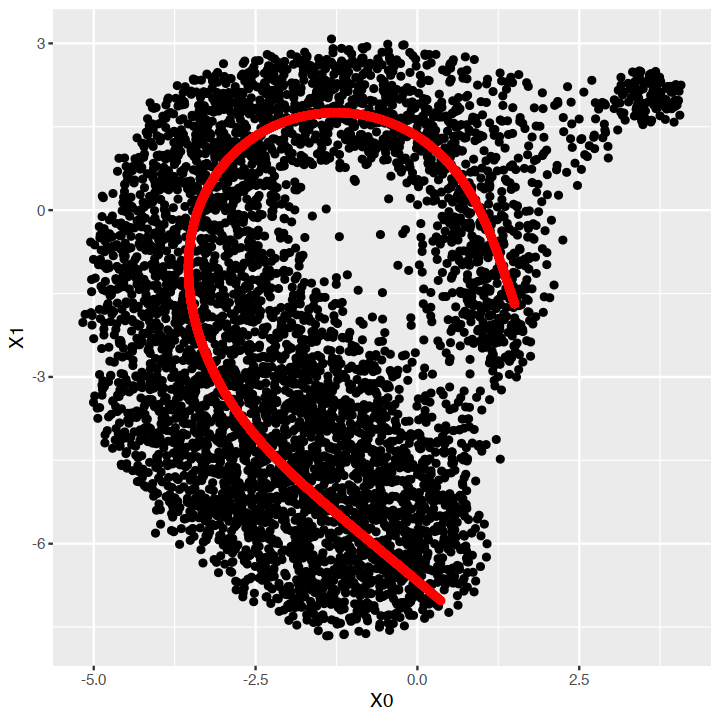

In [357]:
umap_no_g0 = subset(umap_data, bc != "BRQ 48h")
pc = principal_curve(as.matrix(umap_no_g0[,2:3]))
ggplot(umap_data, aes(x=X0, y=X1)) + geom_point() + geom_point(data = as.data.frame(pc$s), color="red")

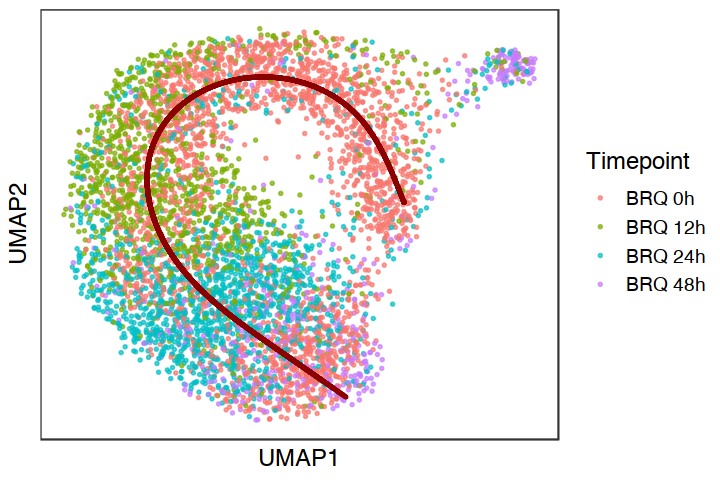

In [385]:
options(repr.plot.width=6, repr.plot.height=4)
ggplot(umap_data, aes(x=X0, y=X1)) + geom_point(aes(color=bc), alpha=0.7, size=0.5) +
geom_point(data = as.data.frame(pc$s), color="darkred", size=0.4) + labs(color="Timepoint") +
theme_bw() + xlab("UMAP1") + ylab("UMAP2") + theme(
    panel.grid = element_blank(),
    axis.ticks = element_blank(),
    axis.text = element_blank(),
    text = element_text(size = 14)
)
ggsave("../output/220512_brq_cc_coloredbytp.pdf", width=6, height=5)

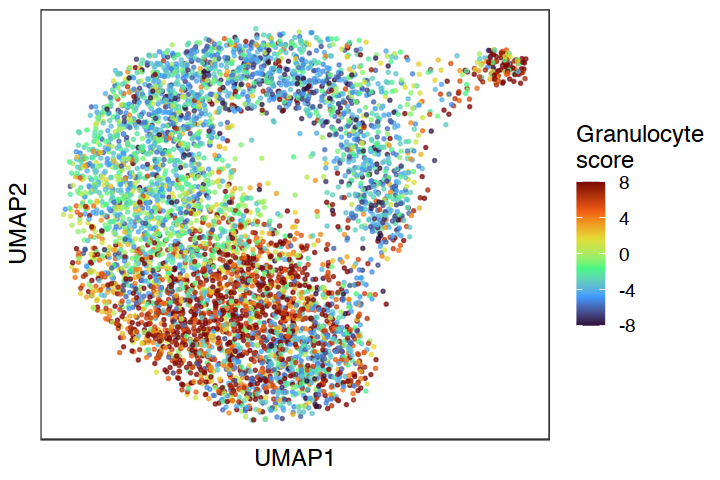

In [302]:
options(repr.plot.width=6, repr.plot.height=4)
ggplot(umap_data, aes(x=X0, y=X1)) + geom_point(aes(color=gran_score), alpha=0.7, size=0.5) +
scale_color_viridis_c(limits = c(-8,8), option="turbo", oob = scales::squish) + labs(color="Granulocyte\nscore") +
theme_bw() + xlab("UMAP1") + ylab("UMAP2") + theme(
    panel.grid = element_blank(),
    axis.ticks = element_blank(),
    axis.text = element_blank(),
    text = element_text(size = 14)
)
#ggsave("../output/220512_brq_cc_coloredbytp.pdf", width=6, height=5)

In [359]:
pc_data = as.data.frame(pc$s)
pc_data$lambda = as.numeric(pc$lambda)
pc_data$bc = umap_no_g0$bc
pc_data$gran_score = as.numeric(umap_no_g0$gran_score)
head(pc_data)

X0          X1         lambda    bc      gran_score
2 -3.31222622  0.2222059  7.502231 BRQ 0h  -5.302458 
3 -0.44234815  1.5820597  3.935352 BRQ 0h  -6.624418 
4 -0.66246415 -6.0285520 14.733743 BRQ 0h   7.848356 
5 -2.27244098 -4.3574912 12.411697 BRQ 24h  5.432767 
6 -1.13778553  1.7505433  4.654614 BRQ 12h -2.946253 
7  0.06420309 -6.7350249 15.747227 BRQ 0h  -6.875832

In [59]:
write.csv(pc_data, "../output/220504_brq_cellcycle_pcdata.csv", quote=F)

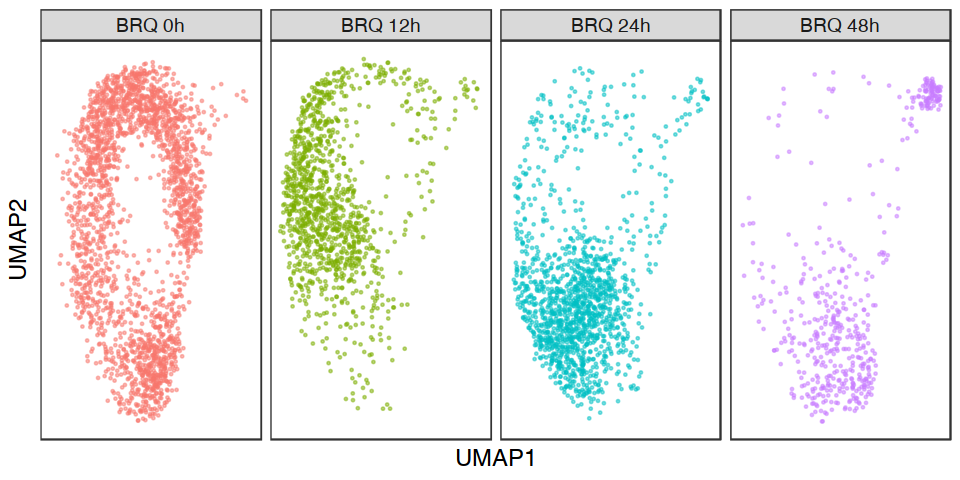

In [306]:
options(repr.plot.width=8, repr.plot.height=4)

ggplot(umap_data, aes(x=X0, y=X1, col=bc)) + geom_point(alpha=0.5, size=0.3) +
facet_wrap(~ bc, ncol=4) + theme_bw() + xlab("UMAP1") + ylab("UMAP2") + theme(
    panel.grid = element_blank(),
    axis.ticks = element_blank(),
    axis.text = element_blank(),
    text = element_text(size = 14),
    legend.position = "none"
)

ggsave("../output/220512_brq_cc_bytp.pdf", width=8, height=2)

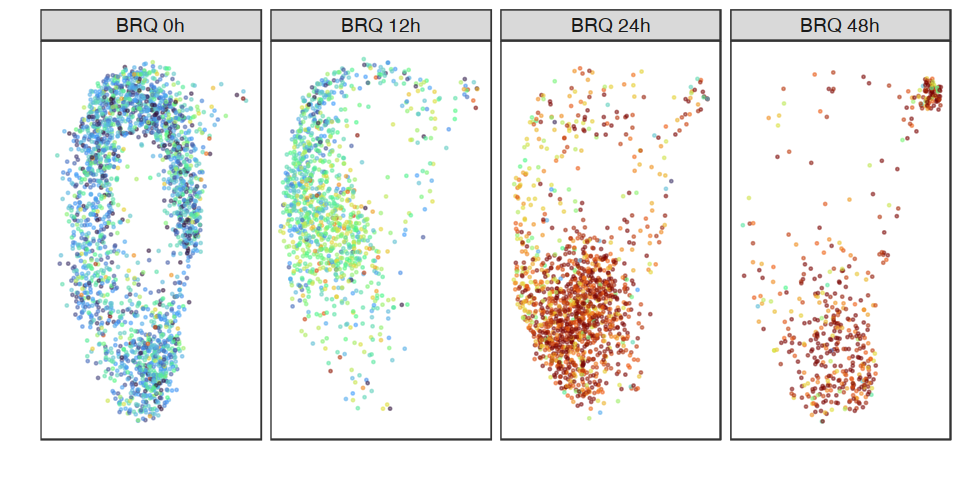

In [348]:
options(repr.plot.width=8, repr.plot.height=4)

g1 = ggplot(umap_data, aes(x=X0, y=X1, col=gran_score)) + geom_point(alpha=0.5, size=0.3) +
scale_color_viridis_c(limits = c(-8,8), option="turbo", oob = scales::squish) + labs(color="Granulocyte\nscore") +
facet_wrap(~ bc, ncol=4) + theme_bw() + xlab("") + ylab("") + theme(
    panel.grid = element_blank(),
    axis.ticks = element_blank(),
    axis.text = element_blank(),
    text = element_text(size = 14),
    legend.position = "none"
)
g1

ggsave("../output/220512_brq_granscore_bytp.pdf", width=8, height=2)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



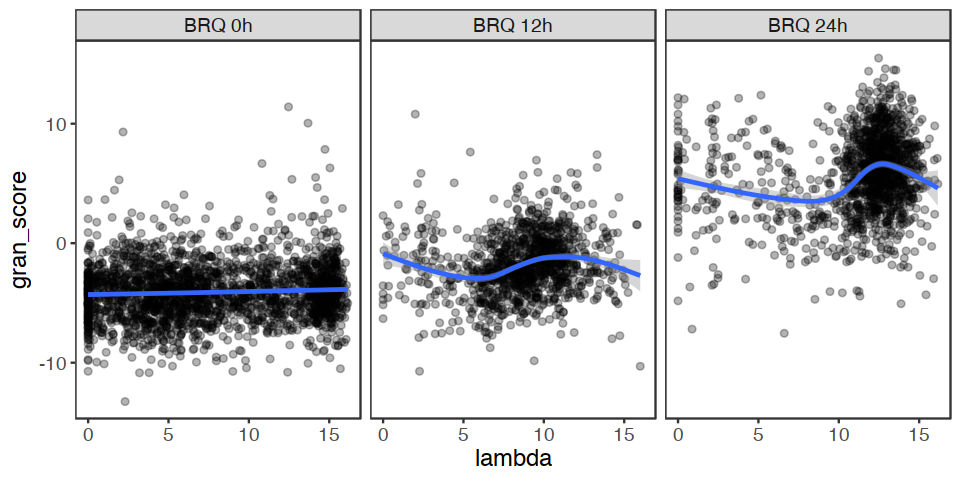

In [323]:
options(repr.plot.width=8, repr.plot.height=4)

ggplot(pc_data, aes(x=lambda, y=gran_score)) + geom_point(alpha=0.3) + geom_smooth() +
facet_wrap(~ bc, ncol=4) + theme_bw() + theme(
    panel.grid = element_blank(),
    text = element_text(size = 14),
    legend.position = "none"
)

In [126]:
table(umap_data$bc)


 BRQ 0h BRQ 12h BRQ 24h BRQ 48h 
   2281    1162    1387     505 

## Unspliced and spliced

In [257]:
unspliced = read.csv("../output/220504_brq_cellcycle_unspliced.csv")
head(unspliced)

X Ung      Rrm2      Aurka     Spi1     Gsn       Fcgr3 lambda    bc     
1 0 0.000000 0.0000000 0.0000000 2.343257 1.1716284 0     14.111764 BRQ 48h
2 1 0.674827 0.6748270 0.0000000 0.674827 0.0000000 0      7.268031 BRQ 0h 
3 2 0.000000 0.0000000 0.6778377 1.355675 0.6778377 0      3.629418 BRQ 0h 
4 3 0.000000 0.9708723 0.0000000 2.912617 0.0000000 0     14.453945 BRQ 0h 
5 4 0.000000 0.0000000 0.8190823 2.457247 0.0000000 0     12.014200 BRQ 24h
6 5 0.000000 0.0000000 0.0000000 0.000000 0.0000000 0      4.459104 BRQ 12h

In [402]:
spliced = read.csv("../output/220504_brq_cellcycle_spliced.csv")
spliced_rescale = spliced
n = dim(spliced_rescale)[2]-1
spliced_rescale[,2:n] = sweep(spliced_rescale[,2:n], 2, apply(spliced_rescale[,2:n], 2, function(x) quantile(x, 0.95)), `/`)
spliced_rescale[,2:n][spliced_rescale[,2:n] > 1] = 1
dim(spliced_rescale)
head(spliced_rescale)

[1] 5335   14

X Ung       Pcna      Rrm2      Aurka     Mcm2      Clspn     Cdca2    
1 0 0.0000000 0.3163503 0.1951898 0.2965075 0.3354652 0.0000000 0.0000000
2 1 0.1655007 0.1591360 0.9327836 0.0000000 0.6750060 0.1516001 0.0000000
3 2 0.8089574 0.1944617 0.1799759 0.0000000 0.2062117 0.3705059 0.2947087
4 3 0.0000000 0.0000000 0.2605635 0.5277532 0.5970939 0.0000000 0.4266700
5 4 0.0000000 0.0000000 0.1802006 0.5474757 0.0000000 0.5564529 0.0000000
6 5 1.0000000 0.0000000 0.7492511 0.0000000 0.7358338 0.3305229 0.0000000
  Cenpe     Spi1       Gsn       Fcgr3     Tyrobp    bc     
1 0.5498908 1.00000000 0.8557897 0.3009086 1.0000000 BRQ 48h
2 0.0000000 0.09066346 0.0000000 0.1009122 0.1270038 BRQ 0h 
3 0.0000000 0.11078936 0.0000000 0.0000000 0.1108548 BRQ 0h 
4 0.4893749 0.72178825 0.7616094 0.1785289 0.7703621 BRQ 0h 
5 1.0000000 0.83195775 1.0000000 1.0000000 0.5327674 BRQ 24h
6 0.0000000 0.00000000 0.0000000 0.0000000 0.4746812 BRQ 12h

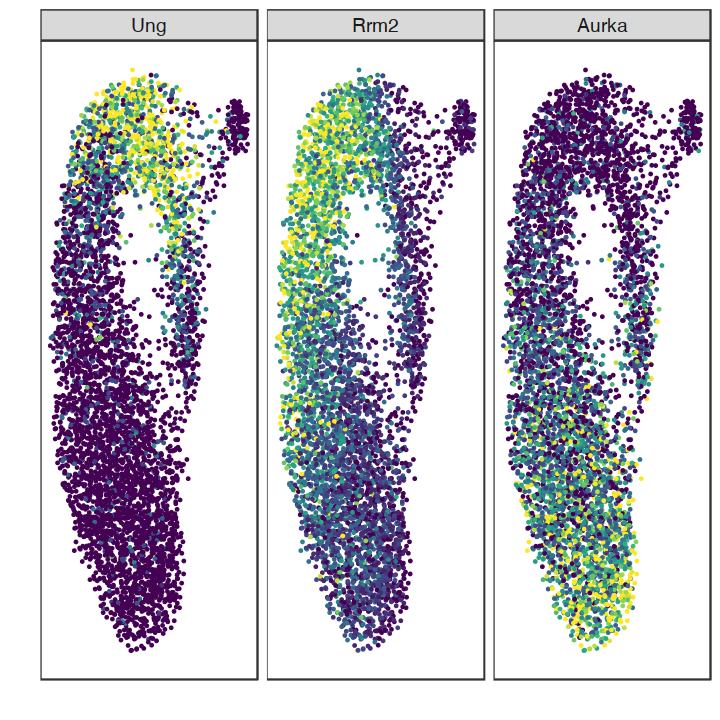

In [377]:
options(repr.plot.width=6, repr.plot.height=6)
spliced_data = melt(cbind(umap_data, spliced_rescale)[,c("X0", "X1", "bc", "Ung", "Rrm2", "Aurka")], id.vars=c("X0", "X1", "bc"))
g3 = ggplot(spliced_data, aes(x=X0, y=X1, col=value)) + geom_point(size=0.3) +
facet_wrap(~ variable, ncol=3) + theme_bw() + labs(col="Relative\nexpression") +
scale_color_viridis_c(limits = c(0, 1)) +
xlab("") + ylab("") + theme(
    panel.grid = element_blank(),
    axis.ticks = element_blank(),
    axis.text = element_blank(),
    text = element_text(size = 14),
    legend.position = "none"
)
g3
#ggsave("../output/220512_brq_cc_bygene.pdf", width=6, height=6)

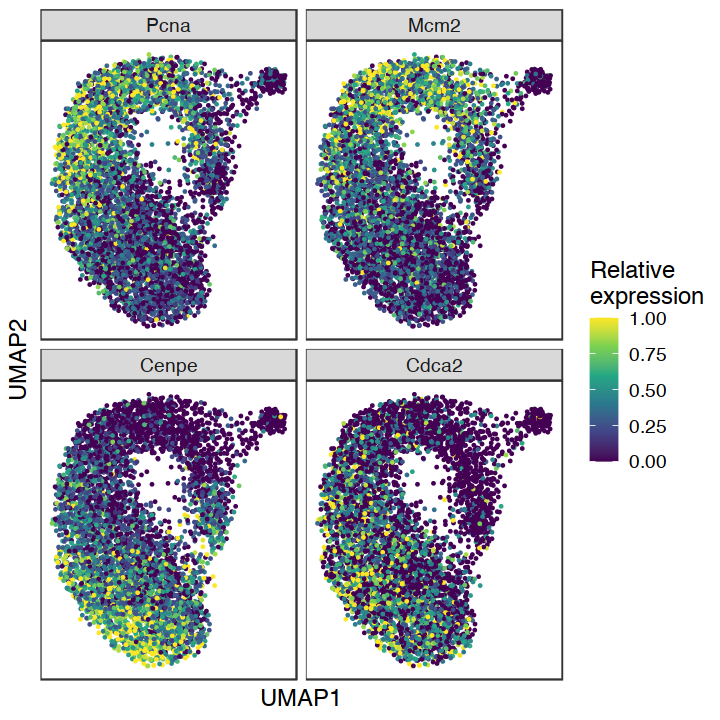

In [384]:
options(repr.plot.width=6, repr.plot.height=6)
spliced_data = melt(cbind(umap_data, spliced_rescale)[,c("X0", "X1", "bc", "Pcna", "Mcm2", "Cenpe", "Cdca2")], id.vars=c("X0", "X1", "bc"))
g3 = ggplot(spliced_data, aes(x=X0, y=X1, col=value)) + geom_point(size=0.3) +
facet_wrap(~ variable, ncol=2) + theme_bw() + labs(col="Relative\nexpression") +
scale_color_viridis_c(limits = c(0, 1)) +
xlab("UMAP1") + ylab("UMAP2") + theme(
    panel.grid = element_blank(),
    axis.ticks = element_blank(),
    axis.text = element_blank(),
    text = element_text(size = 14)
)
g3
ggsave("../output/220512_brq_other_cc_bygene.pdf", width=6, height=6)

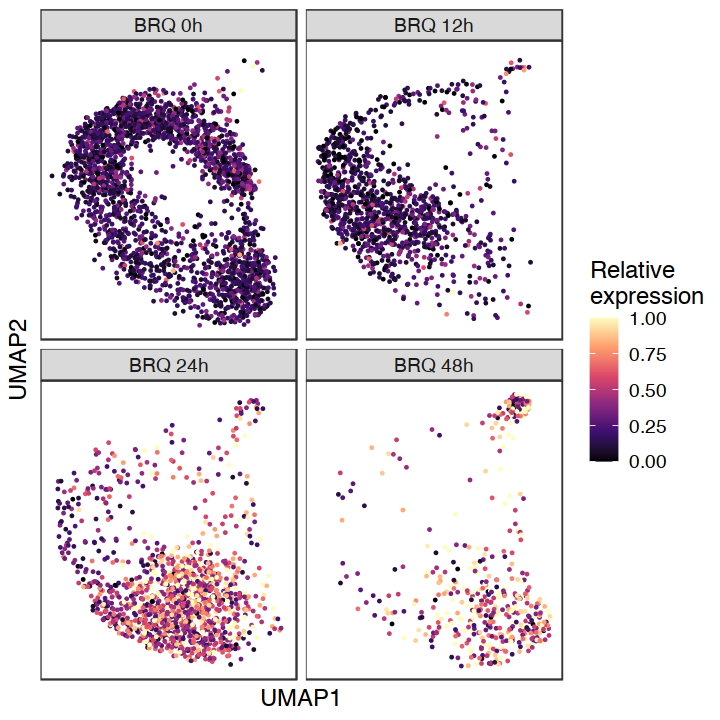

In [277]:
options(repr.plot.width=6, repr.plot.height=6)
spliced_data = melt(cbind(umap_data, spliced_rescale)[,c("X0", "X1", "bc", "Spi1", "Gsn", "Fcgr3")], id.vars=c("X0", "X1", "bc"))
spliced_data = subset(spliced_data, variable == "Spi1")
ggplot(spliced_data, aes(x=X0, y=X1, col=value)) + geom_point(size=0.3) +
facet_wrap(~ bc, ncol=2) + theme_bw() + labs(col="Relative\nexpression") +
scale_color_viridis_c(limits = c(0, 1), option = "magma") +
xlab("UMAP1") + ylab("UMAP2") + theme(
    panel.grid = element_blank(),
    axis.ticks = element_blank(),
    axis.text = element_blank(),
    text = element_text(size = 14)
)
ggsave("../output/220512_brq_cc_spi1.pdf", width=6, height=6)

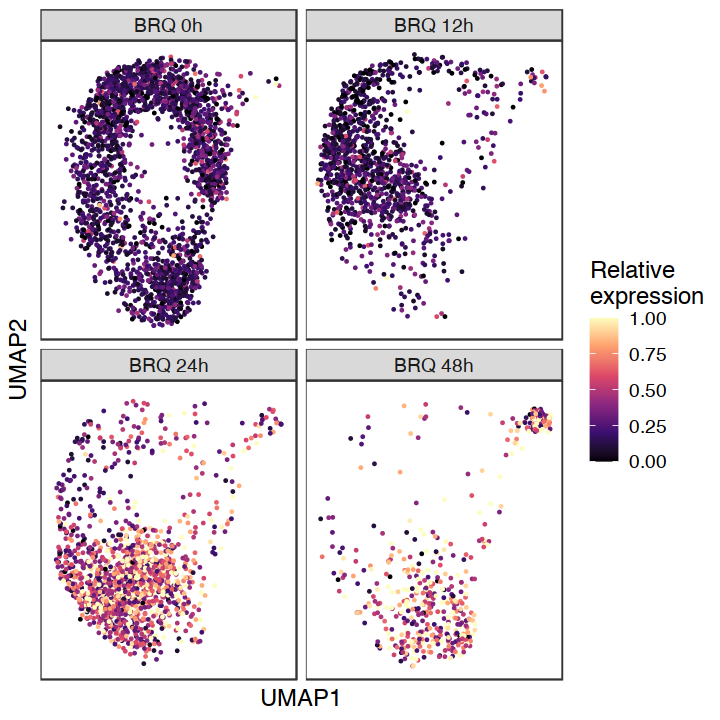

In [403]:
options(repr.plot.width=6, repr.plot.height=6)
spliced_data = melt(cbind(umap_data, spliced_rescale)[,c("X0", "X1", "bc", "Spi1", "Gsn", "Fcgr3", "Tyrobp")], id.vars=c("X0", "X1", "bc"))
spliced_data = subset(spliced_data, variable == "Spi1")
ggplot(spliced_data, aes(x=X0, y=X1, col=value)) + geom_point(size=0.3) +
facet_wrap(~ bc, ncol=2) + theme_bw() + labs(col="Relative\nexpression") +
scale_color_viridis_c(limits = c(0, 1), option = "magma") +
xlab("UMAP1") + ylab("UMAP2") + theme(
    panel.grid = element_blank(),
    axis.ticks = element_blank(),
    axis.text = element_blank(),
    text = element_text(size = 14)
)
ggsave("../output/220512_brq_cc_spi1.pdf", width=6, height=6)

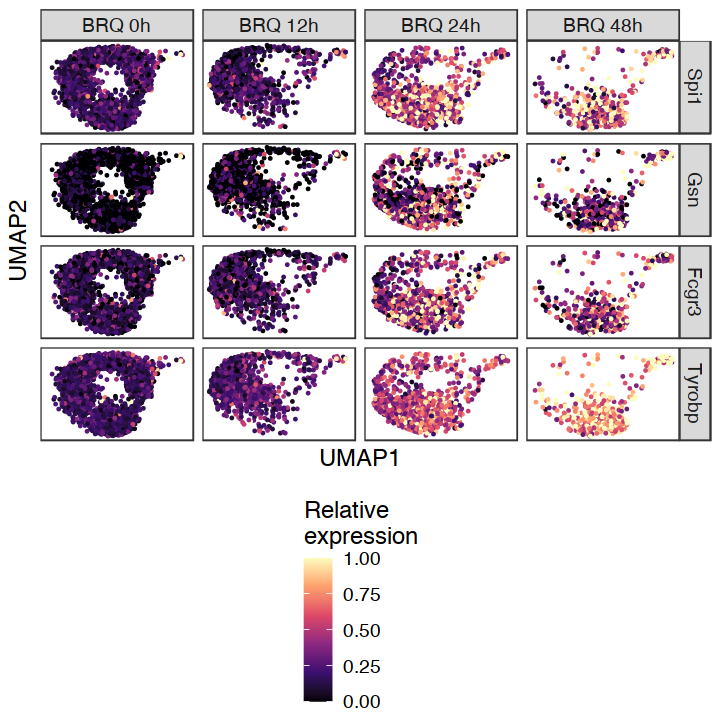

In [407]:
options(repr.plot.width=6, repr.plot.height=6)
spliced_data = melt(cbind(umap_data, spliced_rescale)[,c("X0", "X1", "bc", "Spi1", "Gsn", "Fcgr3", "Tyrobp")], id.vars=c("X0", "X1", "bc"))
ggplot(spliced_data, aes(x=X0, y=X1, col=value)) + geom_point(size=0.3) +
facet_grid(rows=vars(variable), cols=vars(bc)) + theme_bw() + labs(col="Relative\nexpression") +
scale_color_viridis_c(limits = c(0, 1), option = "magma") +
xlab("UMAP1") + ylab("UMAP2") + theme(
    panel.grid = element_blank(),
    axis.ticks = element_blank(),
    axis.text = element_blank(),
    text = element_text(size = 14),
    legend.position = "bottom",
    legend.direction = "vertical"
)
ggsave("../output/220512_brq_cc_bygene.pdf", width=6, height=8)

## All UMAP data

In [188]:
umap_all = read.csv("../output/220512_brq_all_umap.csv")
head(umap_all)

X X0        X1         bc     
1 0  4.039085  0.6811475 BRQ 48h
2 1 -5.132225  1.3466085 BRQ 0h 
3 2 -6.866946  0.2623621 BRQ 0h 
4 3  3.102759 -0.9244620 BRQ 0h 
5 4  5.425229 -3.5795380 BRQ 24h
6 5 -4.369639 -0.1792760 BRQ 12h

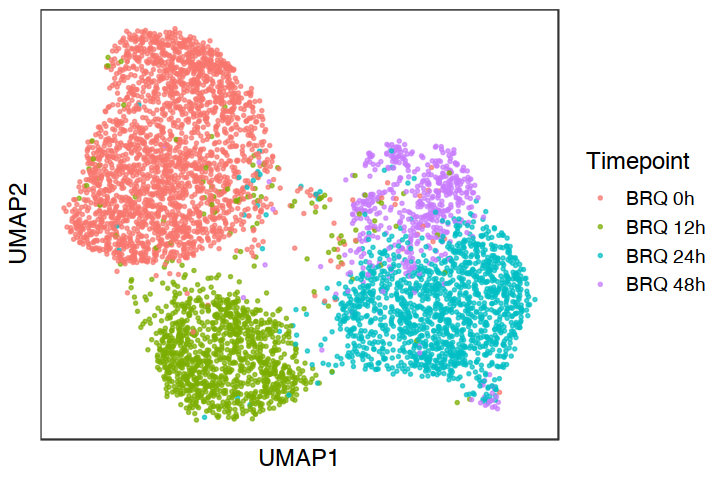

In [196]:
options(repr.plot.width=6, repr.plot.height=4)
ggplot(umap_all, aes(x=X0, y=X1)) + geom_point(aes(color=bc), alpha=0.7, size=0.5) +
labs(color="Timepoint") +
theme_bw() + xlab("UMAP1") + ylab("UMAP2") + theme(
    panel.grid = element_blank(),
    axis.ticks = element_blank(),
    axis.text = element_blank(),
    text = element_text(size = 14)
)
ggsave("../output/220512_brq_umap_coloredbytp.pdf", width=6, height=5)

In [215]:
spliced = read.csv("../output/220504_brq_all_spliced.csv")
spliced_rescale = spliced
spliced_rescale[,2:9] = sweep(spliced_rescale[,2:9], 2, apply(spliced_rescale[,2:9], 2, function(x) quantile(x, 0.95)), `/`)
spliced_rescale[,2:9][spliced_rescale[,2:9] > 1] = 1
dim(spliced_rescale)
head(spliced_rescale)

[1] 5335   10

X Ung       Pcna      Rrm2      Aurka     Spi1       Gsn       Clec4d    
1 0 0.0000000 0.3163503 0.1951898 0.2965075 1.00000000 0.8557897 0.09894505
2 1 0.1655007 0.1591360 0.9327836 0.0000000 0.09066346 0.0000000 0.24886529
3 2 0.8089574 0.1944617 0.1799759 0.0000000 0.11078936 0.0000000 0.06082191
4 3 0.0000000 0.0000000 0.2605635 0.5277532 0.72178825 0.7616094 0.08805607
5 4 0.0000000 0.0000000 0.1802006 0.5474757 0.83195775 1.0000000 0.09134679
6 5 1.0000000 0.0000000 0.7492511 0.0000000 0.00000000 0.0000000 0.65109994
  Fcgr3     bc     
1 0.3009086 BRQ 48h
2 0.1009122 BRQ 0h 
3 0.0000000 BRQ 0h 
4 0.1785289 BRQ 0h 
5 1.0000000 BRQ 24h
6 0.0000000 BRQ 12h

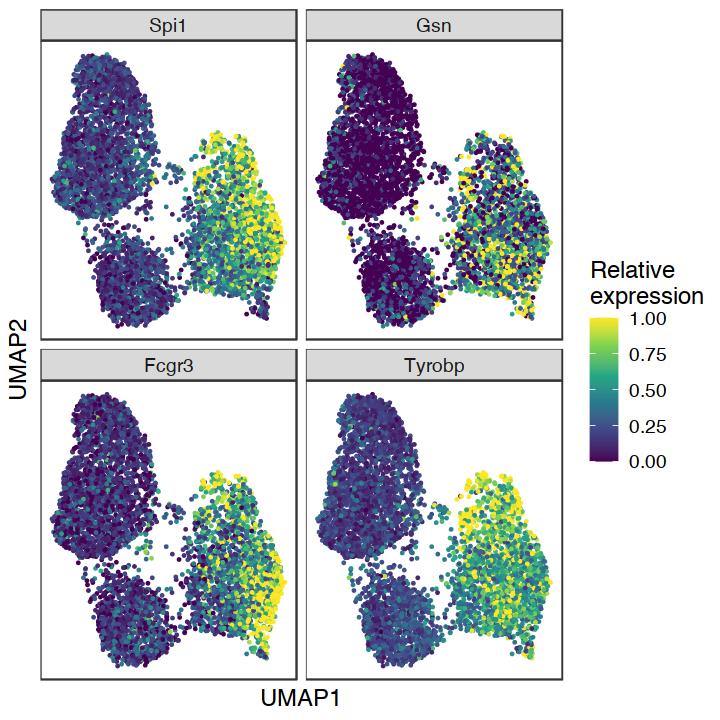

In [412]:
options(repr.plot.width=6, repr.plot.height=6)
spliced_data = melt(cbind(umap_all, spliced_rescale)[,c("X0", "X1", "bc", "Spi1", "Gsn", "Fcgr3", "Tyrobp")], id.vars=c("X0", "X1", "bc"))
ggplot(spliced_data, aes(x=X0, y=X1, col=value)) + geom_point(size=0.3) +
facet_wrap(~ variable, ncol=2) + theme_bw() + labs(col="Relative\nexpression") +
scale_color_viridis_c(limits = c(0, 1)) +
xlab("UMAP1") + ylab("UMAP2") + theme(
    panel.grid = element_blank(),
    axis.ticks = element_blank(),
    axis.text = element_blank(),
    text = element_text(size = 14)
)
ggsave("../output/220512_brq_markers_bygene.pdf", width=6, height=6)

In [229]:
spliced_no_g0 = subset(spliced, bc != "BRQ 48h")
spliced_no_g0["lambda"] = pc_data$lambda
head(spliced_no_g0)

X Ung       Pcna      Rrm2      Aurka    Spi1      Gsn      Clec4d   
2 1 0.5902221 0.5902221 11.214219 0.000000  1.180444 0.000000 2.9511104
3 2 2.8849692 0.7212423  2.163727 0.000000  1.442485 0.000000 0.7212423
4 3 0.0000000 0.0000000  3.132576 2.088384  9.397730 4.176769 1.0441922
5 4 0.0000000 0.0000000  2.166429 2.166429 10.832144 6.499287 1.0832144
6 5 5.1472769 0.0000000  9.007734 0.000000  0.000000 0.000000 7.7209153
7 6 0.0000000 0.7492751  1.498550 2.247825  2.997100 0.000000 0.0000000
  Fcgr3     bc      lambda   
2  1.180444 BRQ 0h   7.563183
3  0.000000 BRQ 0h   3.805244
4  2.088384 BRQ 0h  14.756623
5 21.664288 BRQ 24h 12.309846
6  0.000000 BRQ 12h  4.618221
7  0.000000 BRQ 0h  15.575375

In [235]:
spliced_no_g0_melt = melt(subset(spliced_no_g0, bc == "BRQ 24h")[,c("Ung", "Rrm2", "Aurka", "Spi1", "Gsn", "Fcgr3", "lambda")], 
id.vars = c("lambda"))
colnames(spliced_no_g0_melt) = c("lambda", "gene", "expr")
head(spliced_no_g0_melt)

lambda   gene expr
1 12.30985 Ung  0   
2 12.51621 Ung  0   
3 10.61564 Ung  0   
4 10.24961 Ung  0   
5 12.34567 Ung  0   
6 11.52709 Ung  0

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



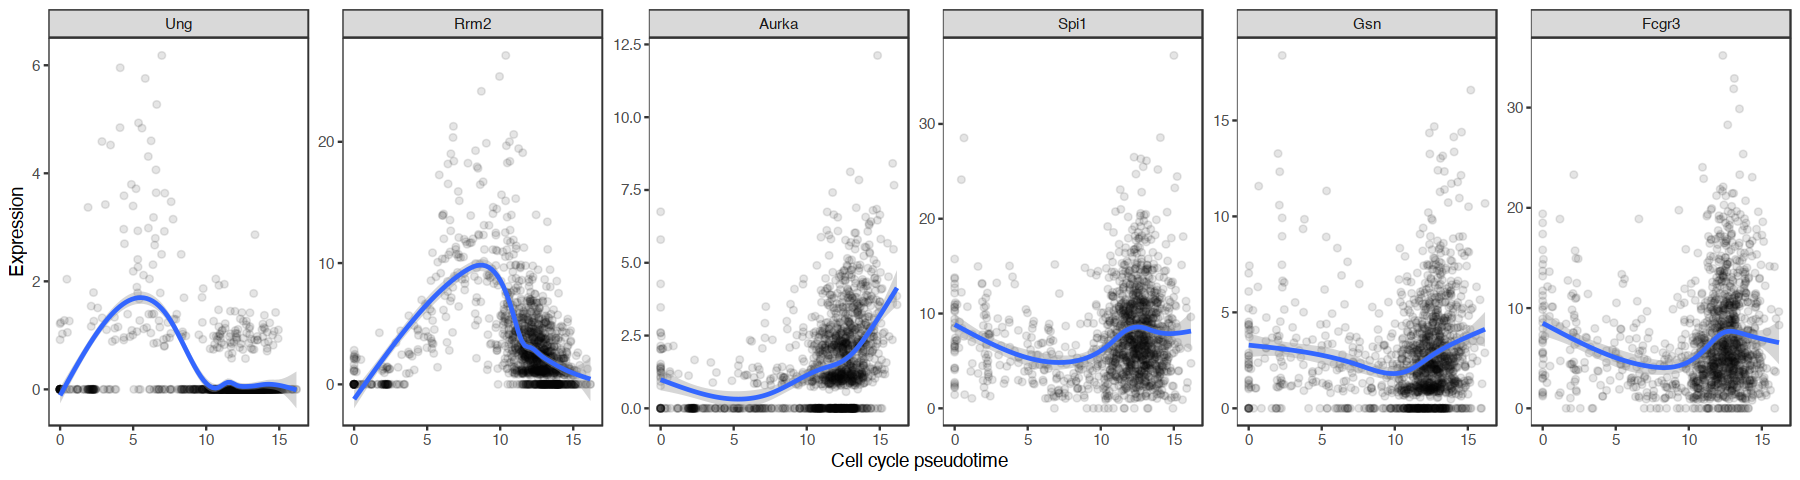

In [241]:
options(repr.plot.width=15, repr.plot.height=4)
ggplot(spliced_no_g0_melt, aes(x=lambda, y=expr)) + geom_point(alpha=0.1) + geom_smooth() +
facet_wrap(vars(gene), ncol=7, scales="free_y") + theme_bw() + xlab("Cell cycle pseudotime") +
ylab("Expression") + theme(
    panel.grid = element_blank()
)
ggsave("../output/220512_brq24_markers_bypt.pdf", width=12, height=2.5)

## E2 w/d cell cycle

In [364]:
e_umap_data = read.csv("../output/220513_e2w_cellcycle_umap.csv")
head(e_umap_data)

X X0         X1         bc         gran_score
1 0 -2.4399450 -4.8604640 E2 w/d 48h  3.0414033
2 1  4.4420120 -1.1431391 E2 w/d 12h  3.5752074
3 2 -0.6651458  0.9074066 E2 w/d 12h  4.0313697
4 3 -4.3564360 -3.4612014 E2 w/d 0h  -4.3392008
5 4 -0.8959265 -2.7525890 E2 w/d 0h  -6.1660796
6 5 -6.5427732 -2.6815586 E2 w/d 12h  0.7044753

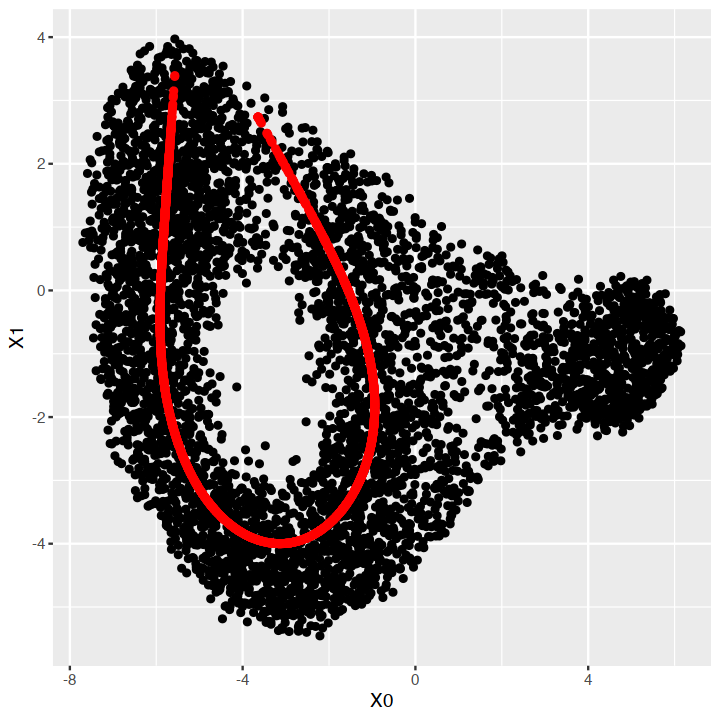

In [365]:
e_umap_no_g0 = subset(e_umap_data, bc == "E2 w/d 0h")
e_pc = principal_curve(as.matrix(e_umap_no_g0[,2:3]))
ggplot(e_umap_data, aes(x=X0, y=X1)) + geom_point() + geom_point(data = as.data.frame(e_pc$s), color="red")

In [366]:
e_pc_data = as.data.frame(e_pc$s)
e_pc_data$lambda = as.numeric(e_pc$lambda)
e_pc_data$bc = e_umap_no_g0$bc
e_pc_data$gran_score = as.numeric(e_umap_no_g0$gran_score)
head(e_pc_data)

X0        X1        lambda     bc        gran_score 
4  -4.447025 -3.604206  7.4907856 E2 w/d 0h -4.33920076
5  -1.107718 -2.662983 11.4506375 E2 w/d 0h -6.16607959
8  -5.723806  1.916672  1.4842213 E2 w/d 0h  7.87843085
9  -5.668625  2.447147  0.9508839 E2 w/d 0h -6.46790943
10 -5.740710  1.753800  1.6479679 E2 w/d 0h  0.07564664
11 -3.765492 -3.911533  8.2411425 E2 w/d 0h  0.21599117

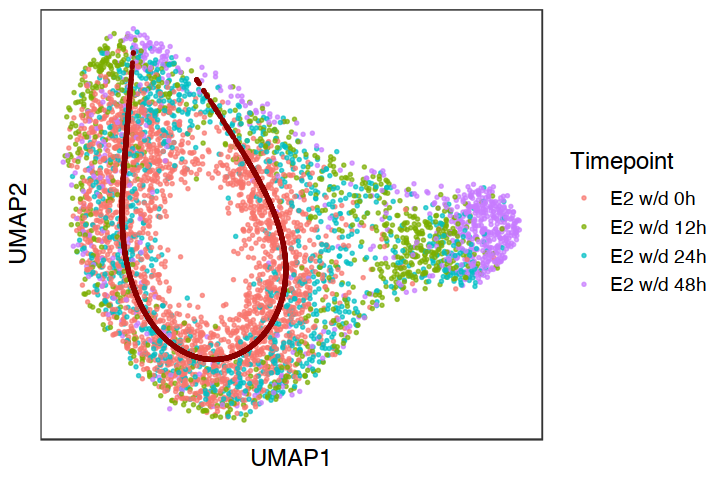

In [337]:
options(repr.plot.width=6, repr.plot.height=4)
ggplot(e_umap_data, aes(x=X0, y=X1)) + geom_point(aes(color=bc), alpha=0.7, size=0.5) +
geom_point(data = as.data.frame(e_pc$s), color="darkred", size=0.4) + labs(color="Timepoint") +
theme_bw() + xlab("UMAP1") + ylab("UMAP2") + theme(
    panel.grid = element_blank(),
    axis.ticks = element_blank(),
    axis.text = element_blank(),
    text = element_text(size = 14)
)
#ggsave("../output/220512_e2w_cc_coloredbytp.pdf", width=6, height=5)

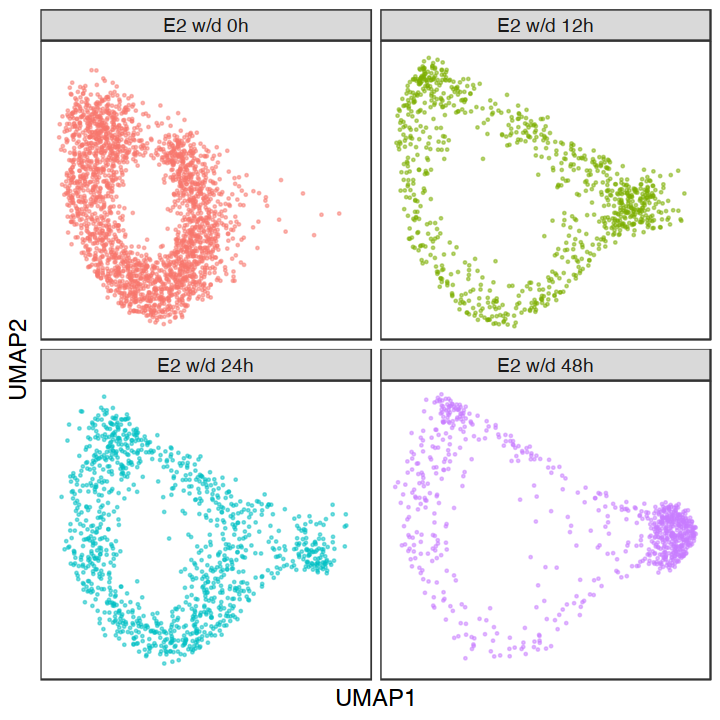

In [338]:
options(repr.plot.width=6, repr.plot.height=6)

ggplot(e_umap_data, aes(x=X0, y=X1, col=bc)) + geom_point(alpha=0.5, size=0.3) +
facet_wrap(~ bc, ncol=2) + theme_bw() + xlab("UMAP1") + ylab("UMAP2") + theme(
    panel.grid = element_blank(),
    axis.ticks = element_blank(),
    axis.text = element_blank(),
    text = element_text(size = 14),
    legend.position = "none"
)

#ggsave("../output/220512_e2w_cc_bytp.pdf", width=6, height=6)

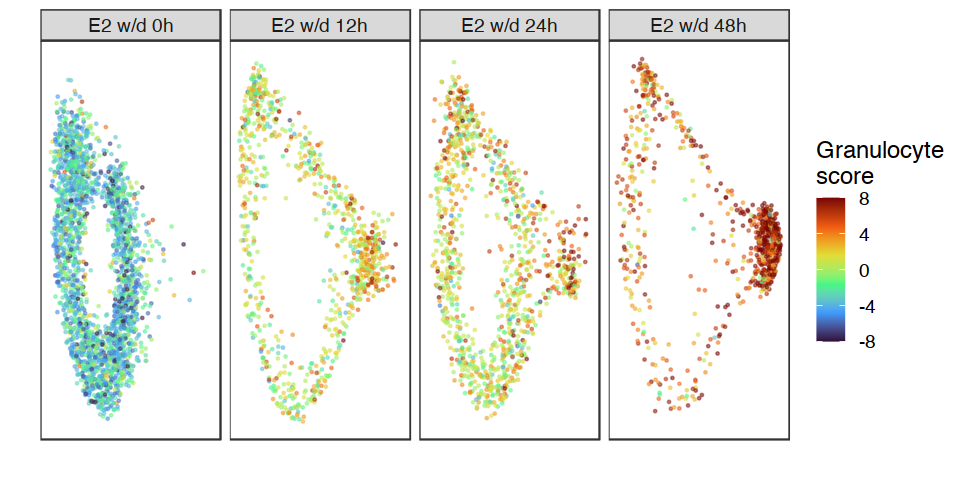

In [347]:
options(repr.plot.width=8, repr.plot.height=4)

g2 = ggplot(e_umap_data, aes(x=X0, y=X1, col=gran_score)) + geom_point(alpha=0.5, size=0.3) +
scale_color_viridis_c(limits = c(-8,8), option="turbo", oob = scales::squish) + labs(color="Granulocyte\nscore") +
facet_wrap(~ bc, ncol=4) + theme_bw() + xlab("") + ylab("") + theme(
    panel.grid = element_blank(),
    axis.ticks = element_blank(),
    axis.text = element_blank(),
    text = element_text(size = 14)
)
g2  # g1 is brq 
#ggsave("../output/220512_brq_granscore_bytp.pdf", width=8, height=2)

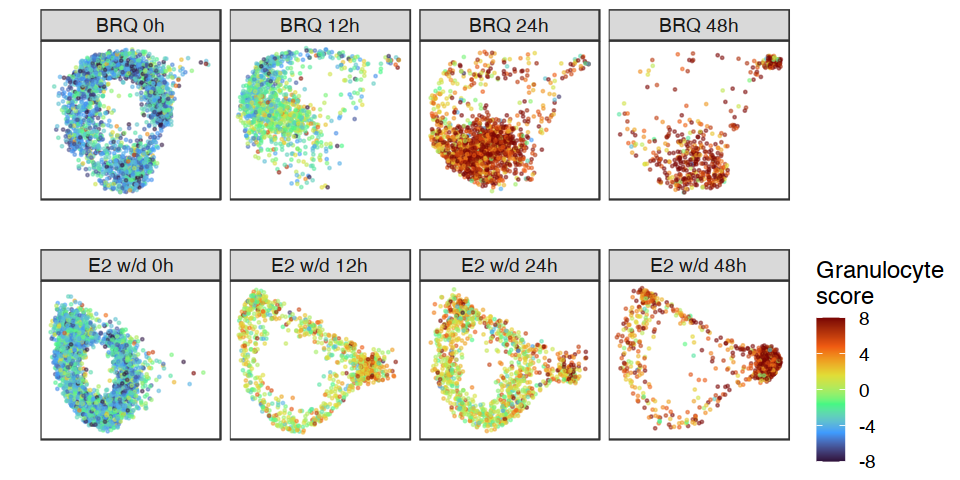

In [351]:
both <- plot_grid(g1, g2, ncol=1, align = "v", axis="tblr")
both
ggsave("../output/220513_granscore_bytp.pdf", width=8, height=4)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



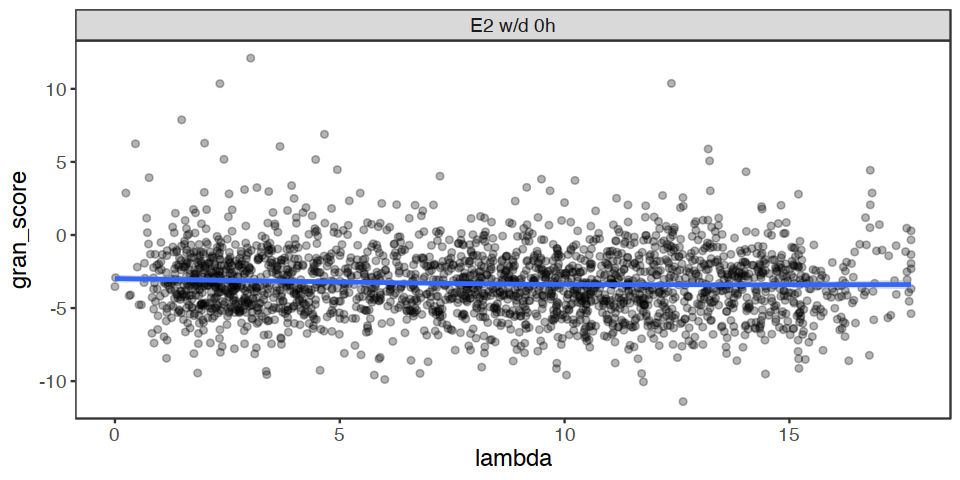

In [354]:
options(repr.plot.width=8, repr.plot.height=4)

ggplot(e_pc_data, aes(x=lambda, y=gran_score)) + geom_point(alpha=0.3) + geom_smooth() +
facet_wrap(~ bc, ncol=4) + theme_bw() + theme(
    panel.grid = element_blank(),
    text = element_text(size = 14),
    legend.position = "none"
)

In [410]:
e_spliced = read.csv("../output/220504_e2w_cellcycle_spliced.csv")
e_spliced_rescale = e_spliced
n = dim(e_spliced_rescale)[2]-1
e_spliced_rescale[,2:n] = sweep(e_spliced_rescale[,2:n], 2, apply(e_spliced_rescale[,2:n], 2, function(x) quantile(x, 0.95)), `/`)
e_spliced_rescale[,2:n][e_spliced_rescale[,2:n] > 1] = 1
dim(e_spliced_rescale)
head(e_spliced_rescale)

[1] 5007   14

X Ung       Pcna      Rrm2      Aurka     Mcm2      Clspn     Cdca2    
1 0 0.3937845 0.0000000 1.0000000 0.0000000 0.4235479 1.0000000 0.0000000
2 1 0.0000000 0.0000000 0.0000000 0.0000000 0.4597092 0.0000000 0.0000000
3 2 0.0000000 0.3674772 0.2108490 0.0000000 0.0000000 0.0000000 0.0000000
4 3 0.1549724 0.1604777 0.8747411 0.0000000 0.6667426 0.2114785 0.0000000
5 4 0.7574955 0.1961013 0.1687769 0.0000000 0.2036873 0.5168469 0.3409406
6 5 0.4389053 1.0000000 0.5215579 0.5140623 0.0000000 1.0000000 0.0000000
  Cenpe     Spi1      Gsn       Fcgr3     Tyrobp     bc        
1 0.0000000 1.0000000 0.0000000 0.5544423 0.62820313 E2 w/d 48h
2 0.0000000 0.6307633 1.0000000 0.4513343 0.90002538 E2 w/d 12h
3 0.9821210 0.6284609 0.0000000 0.3747391 0.24909451 E2 w/d 12h
4 0.0000000 0.0914832 0.0000000 0.1090993 0.06922355 E2 w/d 0h 
5 0.0000000 0.1117911 0.0000000 0.0000000 0.06042151 E2 w/d 0h 
6 0.2024485 0.1943208 0.1459125 0.3089859 0.11202949 E2 w/d 12h

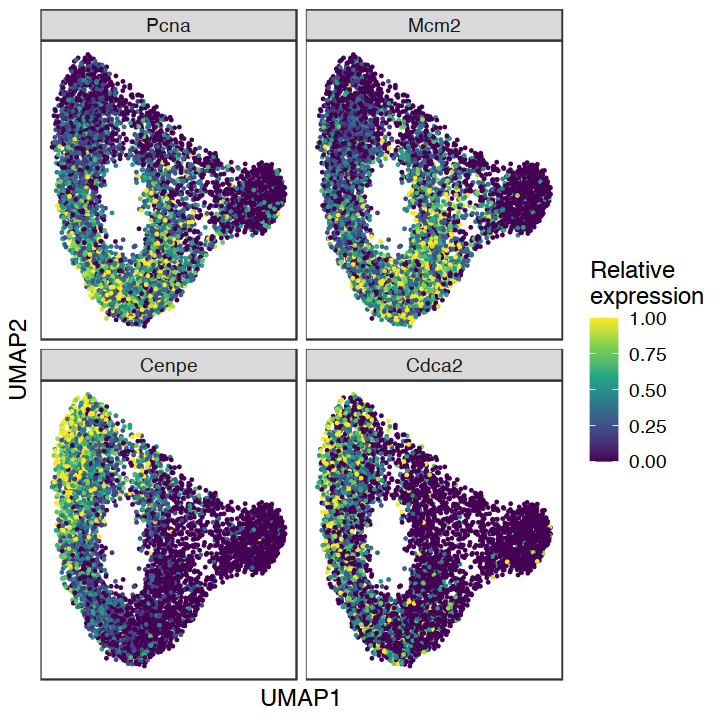

In [399]:
options(repr.plot.width=6, repr.plot.height=6)
e_spliced_data = melt(cbind(e_umap_data, e_spliced_rescale)[,c("X0", "X1", "bc", "Pcna", "Mcm2", "Cenpe", "Cdca2")], id.vars=c("X0", "X1", "bc"))
g4 = ggplot(e_spliced_data, aes(x=X0, y=X1, col=value)) + geom_point(size=0.3) +
facet_wrap(~ variable, ncol=2) + theme_bw() + labs(col="Relative\nexpression") +
scale_color_viridis_c(limits = c(0, 1)) +
xlab("UMAP1") + ylab("UMAP2") + theme(
    panel.grid = element_blank(),
    axis.ticks = element_blank(),
    axis.text = element_blank(),
    text = element_text(size = 14)
)
g4
ggsave("../output/220512_e2w_othercc_bygene.pdf", width=6, height=6)

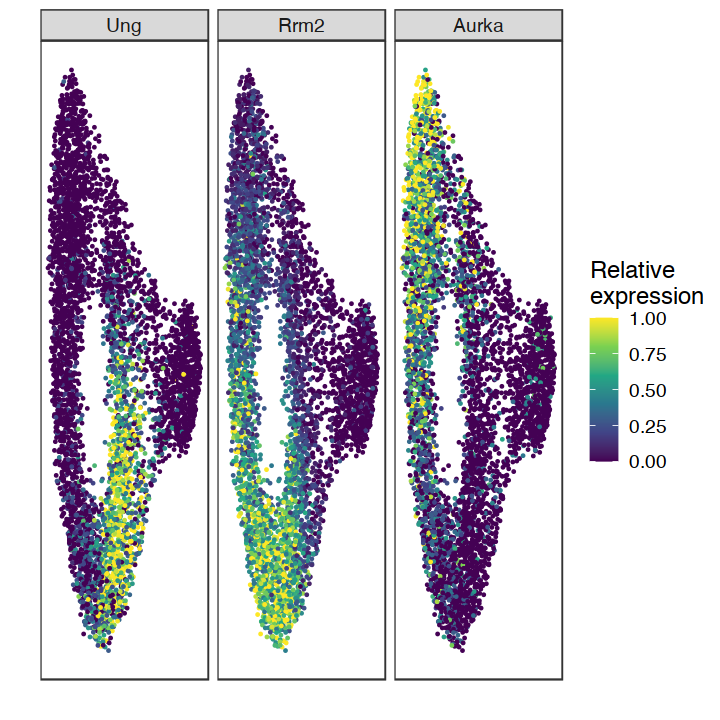

In [376]:
options(repr.plot.width=6, repr.plot.height=6)
e_spliced_data = melt(cbind(e_umap_data, e_spliced_rescale)[,c("X0", "X1", "bc", "Ung", "Rrm2", "Aurka")], id.vars=c("X0", "X1", "bc"))
g4 = ggplot(e_spliced_data, aes(x=X0, y=X1, col=value)) + geom_point(size=0.3) +
facet_wrap(~ variable, ncol=3) + theme_bw() + labs(col="Relative\nexpression") +
scale_color_viridis_c(limits = c(0, 1)) +
xlab("") + ylab("") + theme(
    panel.grid = element_blank(),
    axis.ticks = element_blank(),
    axis.text = element_blank(),
    text = element_text(size = 14)
)
g4
#ggsave("../output/220512_e2w_cc_bygene.pdf", width=6, height=6)

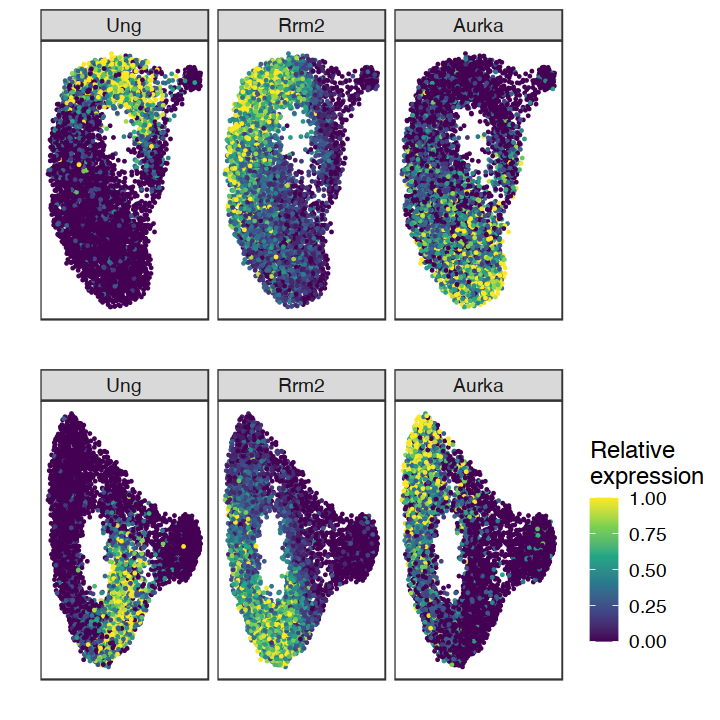

In [378]:
both_cc <- plot_grid(g3, g4, ncol=1, align = "v", axis="tblr")
both_cc
ggsave("../output/220513_ccgenes.pdf", width=6.5, height=4)

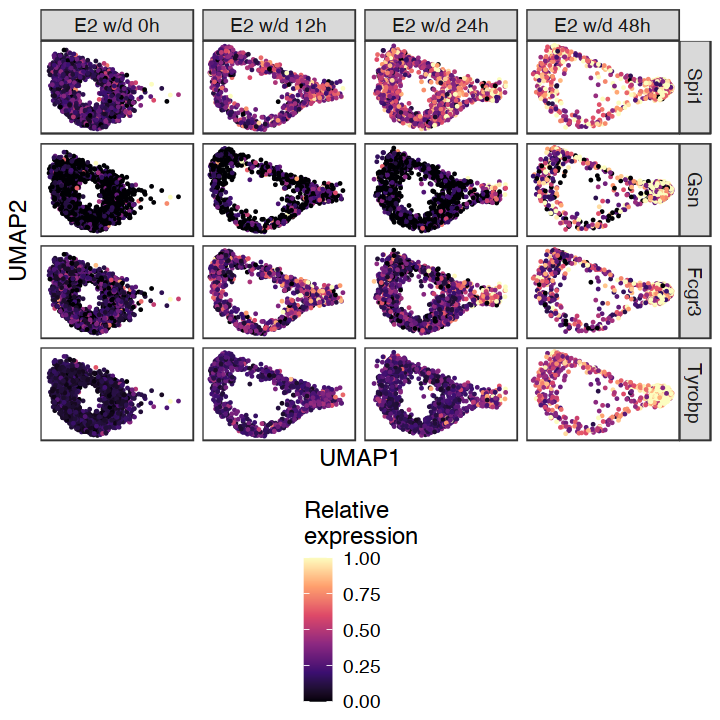

In [411]:
options(repr.plot.width=6, repr.plot.height=6)
e_spliced_data = melt(cbind(e_umap_data, e_spliced_rescale)[,c("X0", "X1", "bc", "Spi1", "Gsn", "Fcgr3", "Tyrobp")], id.vars=c("X0", "X1", "bc"))
ggplot(e_spliced_data, aes(x=X0, y=X1, col=value)) + geom_point(size=0.3) +
facet_grid(rows=vars(variable), cols=vars(bc)) + theme_bw() + labs(col="Relative\nexpression") +
scale_color_viridis_c(limits = c(0, 1), option = "magma") +
xlab("UMAP1") + ylab("UMAP2") + theme(
    panel.grid = element_blank(),
    axis.ticks = element_blank(),
    axis.text = element_blank(),
    text = element_text(size = 14),
    legend.position = "bottom",
    legend.direction = "vertical"
)
ggsave("../output/220512_e2w_cc_bygene.pdf", width=6, height=8)

In [388]:
e_umap_all = read.csv("../output/220512_e2w_all_umap.csv")
head(e_umap_all)

X X0        X1          bc        
1 0 -5.242790  3.68232250 E2 w/d 48h
2 1 -3.034629 -0.07765071 E2 w/d 12h
3 2  3.521875  5.82257200 E2 w/d 12h
4 3  1.993817 -3.12241700 E2 w/d 0h 
5 4  4.558991 -3.21959300 E2 w/d 0h 
6 5  2.809053  4.06721200 E2 w/d 12h

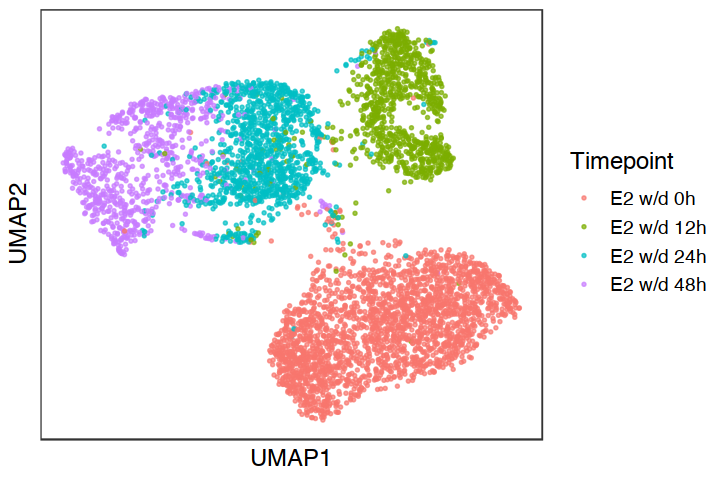

In [389]:
options(repr.plot.width=6, repr.plot.height=4)
ggplot(e_umap_all, aes(x=X0, y=X1)) + geom_point(aes(color=bc), alpha=0.7, size=0.5) +
labs(color="Timepoint") +
theme_bw() + xlab("UMAP1") + ylab("UMAP2") + theme(
    panel.grid = element_blank(),
    axis.ticks = element_blank(),
    axis.text = element_blank(),
    text = element_text(size = 14)
)
ggsave("../output/220512_e2w_umap_coloredbytp.pdf", width=6, height=5)

In [394]:
e_spliced = read.csv("../output/220504_e2w_all_spliced.csv")
e_spliced_rescale = e_spliced
n = dim(e_spliced_rescale)[2]-1
e_spliced_rescale[,2:n] = sweep(e_spliced_rescale[,2:n], 2, apply(e_spliced_rescale[,2:n], 2, function(x) quantile(x, 0.95)), `/`)
e_spliced_rescale[,2:n][e_spliced_rescale[,2:n] > 1] = 1
dim(e_spliced_rescale)
head(e_spliced_rescale)

[1] 5007   12

X Spi1      Clec4d    Tyrobp     Csf2rb    Mpo       Fcer1g    Fcgr3    
1 0 1.0000000 0.3396648 0.62820313 0.0000000 0.0000000 0.5988409 0.5544423
2 1 0.6307633 0.3686645 0.90002538 0.0000000 0.3686740 0.5055309 0.4513343
3 2 0.6284609 0.9182970 0.24909451 0.0000000 0.2782790 0.7195510 0.3747391
4 3 0.0914832 0.6683689 0.06922355 0.0000000 0.2673544 0.1702072 0.1090993
5 4 0.1117911 0.1633473 0.06042151 0.0000000 0.3564033 0.3999820 0.0000000
6 5 0.1943208 0.5678768 0.11202949 0.5724933 0.1376706 0.4820528 0.3089859
  Slpi       Sell     Gsn       bc        
1 0.98515717 0.000000 0.0000000 E2 w/d 48h
2 0.09434711 0.000000 1.0000000 E2 w/d 12h
3 0.00000000 0.619942 0.0000000 E2 w/d 12h
4 0.05701542 0.000000 0.0000000 E2 w/d 0h 
5 0.00000000 0.000000 0.0000000 E2 w/d 0h 
6 0.04844291 0.000000 0.1459125 E2 w/d 12h

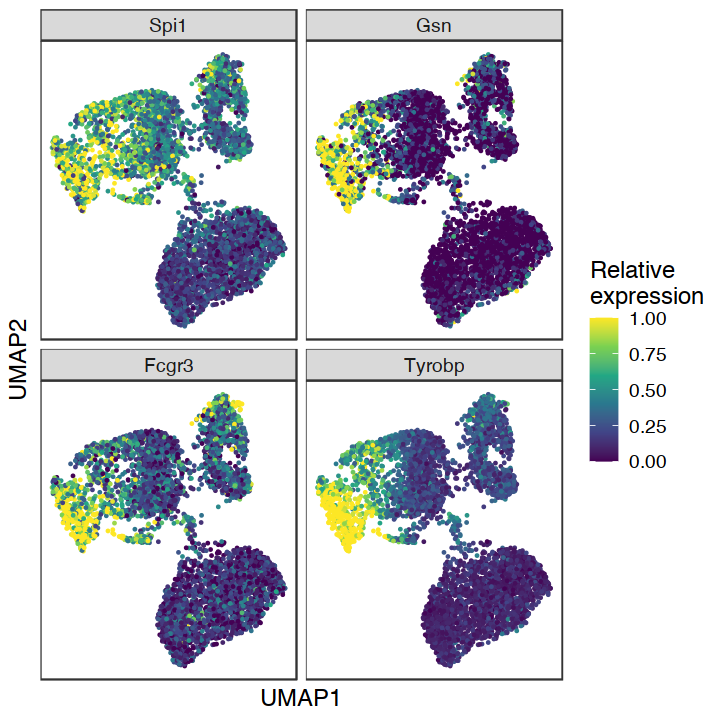

In [413]:
options(repr.plot.width=6, repr.plot.height=6)
e_spliced_data = melt(cbind(e_umap_all, e_spliced_rescale)[,c("X0", "X1", "bc", "Spi1", "Gsn", "Fcgr3", "Tyrobp")], id.vars=c("X0", "X1", "bc"))
ggplot(e_spliced_data, aes(x=X0, y=X1, col=value)) + geom_point(size=0.3) +
facet_wrap(~ variable, ncol=2) + theme_bw() + labs(col="Relative\nexpression") +
scale_color_viridis_c(limits = c(0, 1)) +
xlab("UMAP1") + ylab("UMAP2") + theme(
    panel.grid = element_blank(),
    axis.ticks = element_blank(),
    axis.text = element_blank(),
    text = element_text(size = 14)
)
ggsave("../output/220512_e2w_markers_bygene.pdf", width=6, height=6)